# USV KMeans Clustering

## Imports, style, and function

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
## Increase the width of all cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [32]:
## This function checks for clusters among the call data 
## generated by DeepSqueak as well as the lab's own info 
## on the caller's sex and stimulation frequency

def cluster_two(feat1, feat2, df):
    """Function takes in two numerical call features
       and a dataframe containing those two features
       as well as a 'Sex' column."""
    
    # Select features to cluster first
    df = df.filter(items=[feat1, feat2, 'Sex'])
    print('Original data:')
    print(df.head(), '\n')
    
    # Make a copy of DF
    df_tr = df

    # Transform the 'Sex' column to dummies
    df_tr = pd.get_dummies(df_tr, columns=['Sex'])
    print('Dummy variable data:\n', df_tr.head(), '\n')
    
    # Standardize all the predictors
    clmns = list(df_tr)
    
    # Error checking
    df_array = df_tr.values
    if df_array.dtype == 'float64':
        print('Data is in the correct format, continuing...\n')
    else:
        print('Data type is wrong. Ensure that all columns are numerical. Exiting...')
        sys.exit()
    
    df_tr_std = stats.zscore(df_tr[clmns])
    print('Standardized data:')
    print(df_tr_std, '\n')
    
    # Cluster the data
    kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
    labels = kmeans.labels_
    print('KMeans info:\n', kmeans, '\n')
    print('Cluster labels:', labels, '\n')
    
    # Glue back to original data
    df_tr['clusters'] = labels
    print('Now the data has labels:\n', df_tr.head(), '\n')
    
    # Add the column into our list
    clmns.extend(['clusters'])

    # Analyze the clusters
    print('Now we can analyze the clusters:')
    print(df_tr[clmns].groupby(['clusters']).mean())
    
    # Scatter plot the features
    sns.lmplot(feat1, feat2, data=df_tr, fit_reg=False, hue='clusters',  
               scatter_kws={'marker': 'D', 's': 100})

    plt.title('Clusters: ' + feat1 + ' vs ' + feat2)
    plt.xlabel(feat1)
    plt.ylabel(feat2)

## Load and inspect the data

In [33]:
## Import the data, shuffle the rows, split X and y

os.chdir('/Users/zacharygutierrez/Desktop') 

df = pd.read_excel('total_calls_full.xlsx')
df = df.sample(frac=1).reset_index(drop=True)  # shuffle the rows
columns=list(df) # put the column names in a list
df.head()

,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Sex,Stimulation
0,1,USV,1,0.548342,28.025404,28.071404,0.046000,89.188849,83.057687,93.363607,10.305919,3.150801,52.311493,2.081640,-96.681192,0.184402,male,1
1,2,USV,1,0.589640,28.706204,28.752604,0.046400,89.713191,80.414176,100.426876,20.012701,5.043053,-195.647868,2.894629,-93.535514,0.183509,male,1
2,1,USV,1,0.793835,5.108587,5.158858,0.050271,58.680984,54.176346,60.462060,6.285714,1.945635,-75.057897,1.144653,-64.541213,0.533485,male,1
3,2,USV,1,0.617980,5.218687,5.267770,0.049083,56.467722,26.621034,63.194143,36.573109,10.059194,-475.355253,1.449613,-62.934910,0.557078,male,1
4,3,USV,1,0.708135,5.383426,5.392134,0.008708,55.334573,50.792829,61.887448,11.094620,3.676004,-1354.444064,1.040199,-67.372978,0.536150,male,1


## KMeans info:
To know if your dataframe dataset has suitable content for clustering you can explicitly convert to a numpy array:

-If the array has an homogeneous numerical dtype (typically numpy.float64) then it should be fine for scikit-learn 0.15.2 and later.<br> You might still need to normalize the data with sklearn.preprocessing.StandardScaler for instance.

-If your data frame is heterogeneously typed, the dtype of the corresponding numpy array will be object which is not suitable for scikit-learn. <br> You need to extract a numerical representation for all the relevant features (for instance by extracting dummy variables for categorical features) and drop the columns that are not suitable features (e.g. sample identifiers).

In [34]:
df_array = df.values
print(df_array.dtype)

object


The data is still object type because of columns like 'ID' and 'Sex'. We can drop 'ID' because it's irrelevant, however, 'Sex' is a valuable feature so let's binarize it using pandas built-in get_dummies function. Sklearn's OneHotEncoder cannot process string values directly. If your nominal features are strings, then you need to first map them into integers. However, using get_dummies we simply convert all string columns into one-hot representation, unless columns are specified.

In [35]:
columns

['ID',
 'Label',
 'Accepted',
 'Score',
 'Begin Time (s)',
 'End Time (s)',
 'Call Length (s)',
 'Principal Frequency (kHz)',
 'Low Freq (kHz)',
 'High Freq (kHz)',
 'Delta Freq (kHz)',
 'Frequency Standard Deviation (kHz)',
 'Slope (kHz/s)',
 'Sinuosity',
 'Mean Power (dB/Hz)',
 'Tonality',
 'Sex',
 'Stimulation']

Original data:
   Begin Time (s)  High Freq (kHz)   Sex
0       28.025404        93.363607  male
1       28.706204       100.426876  male
2        5.108587        60.462060  male
3        5.218687        63.194143  male
4        5.383426        61.887448  male 

Dummy variable data:
    Begin Time (s)  High Freq (kHz)  Sex_female  Sex_male
0       28.025404        93.363607           0         1
1       28.706204       100.426876           0         1
2        5.108587        60.462060           0         1
3        5.218687        63.194143           0         1
4        5.383426        61.887448           0         1 

Data is in the correct format, continuing...

Standardized data:
[[ 4.43743538  5.07002163 -0.88027705  0.88027705]
 [ 4.61782297  6.2406796  -0.88027705  0.88027705]
 [-1.63469947 -0.38304183 -0.88027705  0.88027705]
 ...
 [ 1.13955384 -0.36590508  1.13600599 -1.13600599]
 [ 1.18239324  1.05309365  1.13600599 -1.13600599]
 [ 1.27078528 -0.01183698  1.13600599 -1.13600

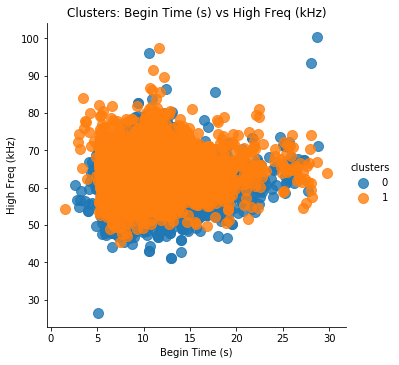

In [37]:
## Pick any two features from the list above and check for trends

cluster_two('Begin Time (s)', 'High Freq (kHz)', df)

#### Notes:
This cell can be used to record any findings...

# End